In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Escolhendo a paleta da visao 
import mplcyberpunk
plt.style.use("cyberpunk")

In [2]:
# Analisando tabela de Alunos
tbAluno = pd.read_csv('database/tbAluno.csv')
tbAluno.shape

(49089, 116)

In [3]:
# Printando todas as colunas para que possamos analisar
for c in tbAluno.columns:
    print(c)

IdAlunoRotinaEducacaoInfantil
IdAluno
IdTurma_x
Data
IdProfessorResponsavel
IdUsuarioResponsavel
IdFormularioRotinaEducacaoInfantil
IdAlunoObs
IdTipoOcorrencia
StImpedimento
DataOcorrencia_x
IdUsuarioRegistro
ObservacaoRegistro
DataLiberacao
IdUsuarioLiberacao
ObservacaoLiberacao
DataInclusao
StExibirInternet
IdProfessorRegistro
DataInicialAtestado
DataFinalAtestado
IdResponsavel_x
IdTurma_y
IdSituacaoAlunoTurma_x
DataSituacaoAtivo
DataSituacaoInativo
IdFaseNotaInicial_x
OrdemChamada
DataHoraEfetivacaoMatricula
IdUsuarioEfetivacaoMatricula
IdAlunoCursoSuperior
ProblemaAutorizadoMatricula
IdUsuarioAutorizacaoMatricula
StAlunoTurmaNaoPermitePParcial
ES_IdCurriculoOptativa
IdResponsavelFinanceiro
IdTipoResponsavelFinanceiro
IdResponsavelSecundario
IdTipoResponsavelSecundario
IdMotivoInativacao
IdEstabEnsinoInativacao
ComentarioInativacao
Comentario
IdPlanoPagamento_PreMatricula
IdPlanoPagamento_Matricula
SituacaoExcecao_IdSituacaoAlunoTurma
SituacaoExcecao_IdUsuario
SituacaoExcecao_DataRe

In [4]:
# Contar o número de alunos únicos na base de dados
print(f'Há {tbAluno.IdAluno.nunique()} e alunos distintos na base, sendo de {tbAluno.IdTurma_x.nunique()} turmas diferentes!!')

Há 8 e alunos distintos na base, sendo de 5 turmas diferentes!!


In [5]:
# Vericando quantidade de registros por alunos
tbAluno.IdAluno.value_counts()

773     20412
727     14875
1147     9984
1174     1550
747      1200
1310      504
740       300
1267      264
Name: IdAluno, dtype: int64

In [6]:
# Vericando etinia de cada um dos alunos (e se há duplicadas)
tbAluno[['IdAluno','CorRaca']].drop_duplicates().reset_index(drop=True)

,IdAluno,CorRaca
0,727,B
1,740,R
2,747,R
3,773,B
4,1147,B
5,1174,P
6,1267,B
7,1310,B


In [7]:
# Vericando data de nascimento e idade de cada um dos alunos atualmente
tbAluno['DataNascimento'] = pd.to_datetime(tbAluno['DataNascimento'])

# A subtração das datas foi feita, e o resultado foi dividido por 365 para converter de dias para anos (idade).
tbAluno['Idade'] = (dt.date.today() - tbAluno['DataNascimento'].dt.date).apply(lambda x: x.days // 365)

# Printando os dados para analisarmos
tbAluno[['IdAluno','DataNascimento', 'Idade']].drop_duplicates().reset_index(drop=True)

,IdAluno,DataNascimento,Idade
0,727,2001-07-23 03:00:00,23
1,740,1995-06-23 03:00:00,29
2,747,1997-09-14 03:00:00,26
3,773,2001-01-28 02:00:00,23
4,1147,2003-11-22 00:00:00,20
5,1174,2003-11-09 02:00:00,20
6,1267,2001-01-06 02:00:00,23
7,1310,2001-10-15 00:00:00,22


In [8]:
# Vericando se os alunos possuem algum tipo de deficiencia
tbAluno[['IdAluno','StDeficienciaCegueira','StDeficienciaBaixaVisao','StDeficienciaSurdez',
          'StDeficienciaAuditiva','StDeficienciaFisica','StDeficienciaSurdoCegueira',
          'StDeficienciaMultipla','StDeficienciaMental']].drop_duplicates().reset_index(drop=True)

,IdAluno,StDeficienciaCegueira,StDeficienciaBaixaVisao,StDeficienciaSurdez,StDeficienciaAuditiva,StDeficienciaFisica,StDeficienciaSurdoCegueira,StDeficienciaMultipla,StDeficienciaMental
0,727,False,False,False,False,False,False,False,False
1,740,False,False,False,False,False,False,False,False
2,747,False,False,False,False,False,False,False,False
3,773,False,False,False,False,False,False,False,False
4,1147,False,False,False,False,False,False,False,False
5,1174,False,False,False,False,False,False,False,False
6,1267,False,False,False,False,False,False,False,False
7,1310,False,False,False,False,False,False,False,False


In [14]:
# Criando base aluno resumida
tbAlunoResumo = tbAluno[['IdAluno','Idade','DataNascimento','CorRaca']].drop_duplicates()

tbAlunoResumo

,IdAluno,Idade,DataNascimento,CorRaca
0,727,23,2001-07-23 03:00:00,B
14875,740,29,1995-06-23 03:00:00,R
15175,747,26,1997-09-14 03:00:00,R
16375,773,23,2001-01-28 02:00:00,B
36787,1147,20,2003-11-22 00:00:00,B
46771,1174,20,2003-11-09 02:00:00,P
48321,1267,23,2001-01-06 02:00:00,B
48585,1310,22,2001-10-15 00:00:00,B


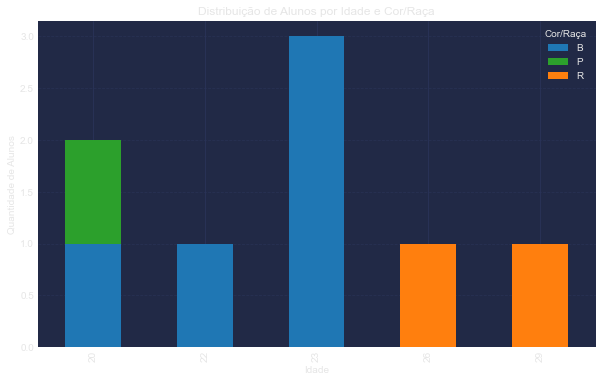

In [18]:
# Definindo cores personalizadas para cada categoria de CorRaca
colors = {
    'B': '#1f77b4',  # Cor azul
    'R': '#ff7f0e',  # Cor laranja
    'P': '#2ca02c'   # Cor verde
}

# Agrupando os dados por idade e cor/raca e contando a quantidade de alunos
df_grouped = tbAlunoResumo.groupby(['Idade', 'CorRaca']).size().unstack(fill_value=0)

# Criando o gráfico de barras empilhadas
df_grouped.plot(kind='bar', stacked=True, color=[colors[col] for col in df_grouped.columns], figsize=(10, 6))

plt.xlabel('Idade')
plt.ylabel('Quantidade de Alunos')
plt.title('Distribuição de Alunos por Idade e Cor/Raça')
plt.legend(title='Cor/Raça')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# Carregando tabela de historico
tbHistorico = pd.read_csv('database/tbHistorico.csv')
tbHistorico.shape

(65, 36)

In [12]:
# Printa das colunas que vamos analisar
tbHistorico.columns

Index(['IdAluno', 'CodigoSerie_x', 'AnoConclusao_x', 'IdDisciplina',
       'StDependencia', 'Nota_', 'NotaFinal', 'CargaHorariaAnual',
       'QuantidadeFaltasAnual', 'ResultadoFinal_x', 'IdSerie_x',
       'CargaHorariaAnualExibicao', 'StCHIgnorarSoma_x', 'IdHistoricoNotas',
       'NovoEnsinoMedio_GrupoEstruturaCurricular',
       'NovoEnsinoMedio_AreaConhecimento', 'CargaHorariaAnualHoraMinuto',
       'CargaHorariaAnualHoraMinutoExibicao',
       'StUsaCargaHorariaAnualHoraMinutoTexto', 'FaltasHoraMinuto',
       'CargaHorariaAula', 'CodigoSerie_y', 'AnoConclusao_y',
       'ResultadoFinal_y', 'IdEstabelecimentoEnsino', 'DiasLetivos',
       'CargaHorariaTotal', 'Observacao', 'IdSerie_y',
       'CargaHorariaTotalExibicao', 'StCHIgnorarSoma_y', 'FrequenciaTotal',
       'CargaHorariaTotalHoraMinuto', 'CargaHorariaTotalHoraMinutoExibicao',
       'StUsaCargaHorariaTotalHoraMinutoTexto', 'TotalFaltasTexto'],
      dtype='object')

In [2]:
# Dados de frequência
tbDiarioFrequencia = pd.read_csv('database/TbDiarioFrequencia.csv')

# Dados de notas e desempenho
tbFase = pd.read_csv('database/tbFase.csv')

In [3]:
# Limpeza da tabela de alunos
tbAluno['IdTipoOcorrencia'].fillna(tbAluno['IdTipoOcorrencia'].mode()[0], inplace=True)
tbAluno['IdTurma'].fillna(tbAluno['IdTurma'].mode()[0], inplace=True)

# Remover registros com notas negativas ou nulas
tbFase = tbFase[(tbFase['NotaFase'] >= 0) & (tbFase['NotaFase'].notnull())]

# Limpeza da tabela de frequência 
tbDiarioFrequencia = tbDiarioFrequencia[tbDiarioFrequencia['StPresencaFalta'].notnull()]

In [6]:
# Vamos começar com algumas análises descritivas
# Análise descritiva do dataset de alunos
aluno_descriptive = tbAluno.describe(include='all')

,IdAlunoRotinaEducacaoInfantil,IdAluno,IdTurma_x,Data,IdProfessorResponsavel,IdUsuarioResponsavel,IdFormularioRotinaEducacaoInfantil,IdAlunoObs,IdTipoOcorrencia,StImpedimento,...,StRecursoLinguaPortuguesaSegundaLingua,StRecursoProvaEmVideo,StPermiteUsoImagem,StEstrangeiro,Unnamed: 55,DataOcorrencia_y,IdTurma,IdSituacaoAlunoTurma_y,IdFaseNotaInicial_y,IdUsuario
count,49089.000000,49089.000000,49089.000000,49089,49089.000000,0.0,49089.0,49089.000000,49089.000000,49089,...,49089,49089,49089,49089,0.0,49089,49089.000000,41486.000000,0.0,49089.000000
unique,NaN,NaN,NaN,66,NaN,NaN,NaN,NaN,NaN,1,...,1,1,1,1,NaN,92,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2022-09-20 00:00:00,NaN,NaN,NaN,NaN,NaN,False,...,False,False,False,False,NaN,2022-06-08 11:15:55.730000,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1508,NaN,NaN,NaN,NaN,NaN,49089,...,49089,49089,49089,49089,NaN,1458,NaN,NaN,NaN,NaN
mean,64766.091833,855.121860,305.032512,NaN,10.755465,NaN,1.0,9662.590540,22.275113,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,312.889996,4.191896,NaN,75.280674
std,38270.366572,178.101829,89.656826,NaN,4.557007,NaN,0.0,4567.253259,6.679764,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,178.423126,4.069338,NaN,119.351520
min,3923.000000,727.000000,231.000000,NaN,3.000000,NaN,1.0,138.000000,11.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,116.000000,1.000000,NaN,14.000000
25%,21034.000000,727.000000,231.000000,NaN,8.000000,NaN,1.0,5766.000000,20.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,142.000000,1.000000,NaN,15.000000
50%,74733.000000,773.000000,273.000000,NaN,11.000000,NaN,1.0,10224.000000,21.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,270.000000,1.000000,NaN,15.000000
75%,98479.000000,1147.000000,453.000000,NaN,11.000000,NaN,1.0,11986.000000,26.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,453.000000,9.000000,NaN,16.000000


In [4]:


# Análise descritiva do histórico acadêmico dos alunos
historico_descriptive = tbHistorico.describe(include='all')

# Análise de frequência
frequencia_counts = tbDiarioFrequencia['StPresencaFalta'].value_counts()

# Análise de notas
notas_distribution = tbFase['NotaFase'].describe()

# Exibir os resultados das análises iniciais
aluno_descriptive, historico_descriptive

(        IdAlunoRotinaEducacaoInfantil       IdAluno     IdTurma_x  \
 count                    49089.000000  49089.000000  49089.000000   
 unique                            NaN           NaN           NaN   
 top                               NaN           NaN           NaN   
 freq                              NaN           NaN           NaN   
 mean                     64766.091833    855.121860    305.032512   
 std                      38270.366572    178.101829     89.656826   
 min                       3923.000000    727.000000    231.000000   
 25%                      21034.000000    727.000000    231.000000   
 50%                      74733.000000    773.000000    273.000000   
 75%                      98479.000000   1147.000000    453.000000   
 max                     118065.000000   1310.000000    505.000000   
 
                        Data  IdProfessorResponsavel  IdUsuarioResponsavel  \
 count                 49089            49089.000000                   0.0   
 u

In [6]:
frequencia_counts

P    246374
F     61650
J      5136
Name: StPresencaFalta, dtype: int64

In [7]:
notas_distribution

count    1151.000000
mean        3.685143
std         2.571512
min         0.000000
25%         1.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: NotaFase, dtype: float64

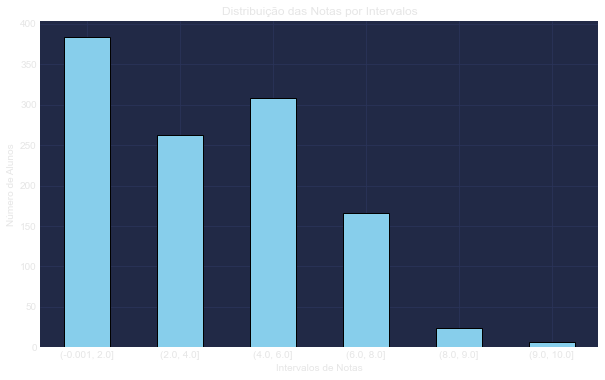

In [8]:
# Agrupar as notas em intervalos
intervalos = pd.cut(tbFase['NotaFase'], bins=[0, 2, 4, 6, 8, 9, 10], include_lowest=True)

# Contar a frequência de cada intervalo
distribuicao_notas = intervalos.value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
distribuicao_notas.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição das Notas por Intervalos')
plt.xlabel('Intervalos de Notas')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0)  # Manter os rótulos do eixo X na horizontal
plt.show()

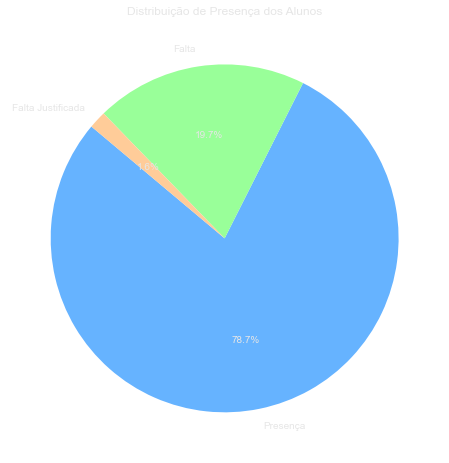

In [9]:
# Mapeamento para rótulos personalizados
label_map = {'P': 'Presença', 'F': 'Falta', 'J': 'Falta Justificada'}
frequencia_counts.index = frequencia_counts.index.map(label_map)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(frequencia_counts, labels=frequencia_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'], startangle=140)
plt.title('Distribuição de Presença dos Alunos')
plt.show()

Correlação entre frequência e notas: 0.22


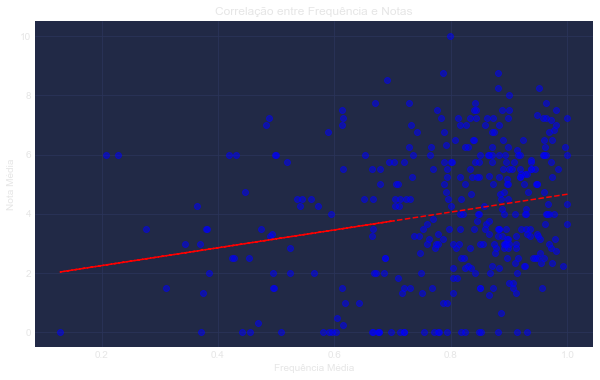

In [10]:
# Mapeamento da presença para numérico (1 para presente, 0 para falta, 0.5 para falta justificada)
presenca_map = {'P': 1, 'F': 0, 'J': 0.5}
tbDiarioFrequencia['PresencaNumerica'] = tbDiarioFrequencia['StPresencaFalta'].map(presenca_map)

# Calcular a frequência média por aluno
frequencia_media = tbDiarioFrequencia.groupby('IdAluno')['PresencaNumerica'].mean().reset_index()

# Calcular a nota média por aluno
nota_media = tbFase.groupby('IdAluno')['NotaFase'].mean().reset_index()

# Unir as tabelas de frequência média e nota média
df_correlation = pd.merge(frequencia_media, nota_media, on='IdAluno')

# Calcular a correlação entre frequência e notas
correlation, _ = pearsonr(df_correlation['PresencaNumerica'], df_correlation['NotaFase'])
print(f"Correlação entre frequência e notas: {correlation:.2f}")

# Visualizar a correlação com um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_correlation['PresencaNumerica'], df_correlation['NotaFase'], color='blue', alpha=0.5)
plt.title('Correlação entre Frequência e Notas')
plt.xlabel('Frequência Média')
plt.ylabel('Nota Média')
plt.grid(True)

# Adicionar uma linha de tendência
z = np.polyfit(df_correlation['PresencaNumerica'], df_correlation['NotaFase'], 1)
p = np.poly1d(z)
plt.plot(df_correlation['PresencaNumerica'], p(df_correlation['PresencaNumerica']), "r--")

plt.show()